<a href="https://colab.research.google.com/github/kanoj-reddy-21/PDS/blob/main/COMPSCI_5590_hw1_gollamudi_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Reading the CSV file from the URL
data <- read_csv("https://docs.google.com/spreadsheets/d/1nwizbI8TSrczUF9VVwnU_BlFIUnWmiuM9K090OBhbqY/export?format=csv")

New names:
• `` -> `...1`
Rows: 79642 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): county, city, state, make, model, electric_vehicle_type, clean_alte...
dbl (5): ...1, postal_code, model_year, electric_range, legislative_district

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
head(data)

...1,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_eligibility,electric_range,legislative_district,electric_utility
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,King,Seattle,WA,98177,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,36,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,Yakima,Moxee,WA,98936,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,15,PACIFICORP
3,King,Seattle,WA,98117,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,King,Newcastle,WA,98059,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,41,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
5,Kitsap,Bremerton,WA,98312,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,26,PUGET SOUND ENERGY INC
7,King,Bellevue,WA,98004,2019,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,48,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


Que1: Generate summary statistics (including skewness and kurtosis) of the electric range for Battery
Electric Vehicles and Plug-in Hybrid Electric Vehicles. Compare the results.

In [31]:
bevs <- data[data$`electric_vehicle_type` == "Battery Electric Vehicle (BEV)", ]
phevs <- data[data$`electric_vehicle_type` == "Plug-in Hybrid Electric Vehicle (PHEV)", ]

# Calculating summary statistics, skewness and kurtosis for BEVs and PHEVs
bev_range_summary <- summary(bevs$electric_range)
bev_skewness <- skewness(bevs$electric_range, na.rm = TRUE)
bev_kurtosis <- kurtosis(bevs$electric_range, na.rm = TRUE)

phev_range_summary <- summary(phevs$electric_range)
phev_skewness <- skewness(phevs$electric_range, na.rm = TRUE)
phev_kurtosis <- kurtosis(phevs$electric_range, na.rm = TRUE)

cat("Summary statistics for BEVs:\n", bev_range_summary, "\nSkewness:", bev_skewness, "\nKurtosis:", bev_kurtosis, "\n\n")
cat("Summary statistics for PHEVs:\n", phev_range_summary, "\nSkewness:", phev_skewness, "\nKurtosis:", phev_kurtosis)

Summary statistics for BEVs:
 29 125 215 194.4145 238 337 
Skewness: -0.3382672 
Kurtosis: 2.083687 

Summary statistics for PHEVs:
 6 20 26 30.63539 38 153 
Skewness: 2.126404 
Kurtosis: 10.49684

BEVs have a higher median range (215 miles) compared to PHEVs (26 miles) due to their reliance on electric power. BEVs show greater variability in range (29–337 miles), while PHEVs have less variation (6–153 miles). BEVs are slightly skewed towards longer ranges (-0.34 skew) with a few models having very high ranges, whereas PHEVs have a strong positive skew (2.13), meaning most have short ranges with a few outliers. BEVs' kurtosis (2.08) suggests a moderately peaked distribution, while PHEVs' high kurtosis (10.5) indicates a highly concentrated distribution of shorter ranges with a few extremes.

Que2: Calculate the frequency distribution of the electric range of vehicles (hint: first divide the
variables into four categories and then find out the distribution). Comment on the results.

In [37]:
# using cut function to device electric_range into 4 categories
data$Range_Category <- cut(data$electric_range, breaks = 4, labels = c("Low", "Medium", "High", "Very High"))

print(table(data$Range_Category))



      Low    Medium      High Very High 
    41579      6229     22853      8981 


The dataset suggests that most vehicles have either a Low (41,579 vehicles) or High (22,853 vehicles) electric range, indicating a bimodal distribution.

Que3: Generate a cluster bar plot by placing the percentage of vehicles on the y-axis and electric
vehicle types on the x-axis. Each electric vehicle type should be divided into two bars based on
the variable “clean alternative fuel vehicle eligibility.” Note that the percentage of vehicles
should be calculated based on the total sample of vehicles. Comment on the results.

`summarise()` has grouped output by 'electric_vehicle_type'. You can override
using the `.groups` argument.


# A tibble: 4 × 4
  electric_vehicle_type                  clean_alternative_fu…¹ Count Percentage
  <chr>                                  <chr>                  <int>      <dbl>
1 Battery Electric Vehicle (BEV)         Clean Alternative Fue… 46903    58.9   
2 Battery Electric Vehicle (BEV)         Not eligible due to l…     8     0.0100
3 Plug-in Hybrid Electric Vehicle (PHEV) Clean Alternative Fue… 15246    19.1   
4 Plug-in Hybrid Electric Vehicle (PHEV) Not eligible due to l… 17485    22.0   
# ℹ abbreviated name: ¹​clean_alternative_fuel_vehicle_eligibility


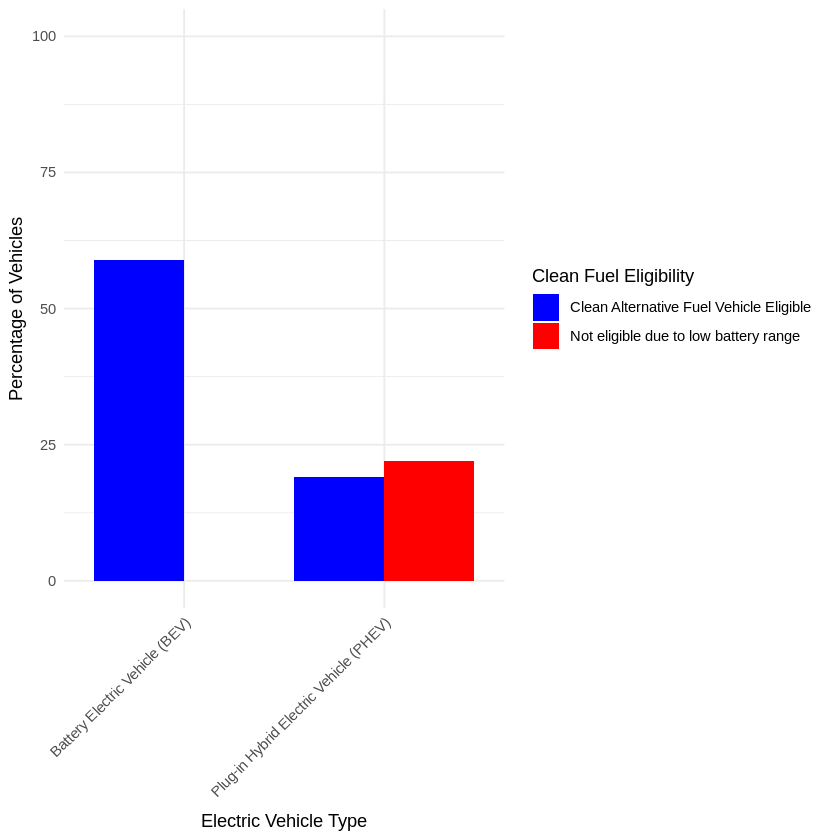

In [92]:


total_vehicles <- nrow(data)
# Summarize data to count the number of vehicles in each category
data_summary <- data %>%
  group_by(electric_vehicle_type, clean_alternative_fuel_vehicle_eligibility) %>%
  summarise(Count = n()) %>%
  ungroup() %>%
  mutate(Percentage = 100 * Count / total_vehicles)

# Check the summarized data to confirm two bars per vehicle type
print(data_summary)

# Create the cluster bar plot
ggplot(data_summary, aes(x = electric_vehicle_type, y = Percentage, fill = clean_alternative_fuel_vehicle_eligibility)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(y = "Percentage of Vehicles", x = "Electric Vehicle Type",
       fill = "Clean Fuel Eligibility") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, 100)) +  # Set y-axis scale from 0 to 100%
  scale_fill_manual(values = c("Clean Alternative Fuel Vehicle Eligible" = "blue", "Not eligible due to low battery range" = "red")) +  # Set colors for each eligibility

  theme(axis.text.x = element_text(angle = 45, hjust = 1))# Adjust x-axis text for readability

BEV Which are not eligible due to low battery range are almost zero and most of them are eligible for clean alternative fuel vehicle. Where as PHEV's have almost equal number of eligible and not eligible with slightly higher side for non eligible vehicles.

Que4: Generate box plots of the electric range of vehicles for Battery Electric Vehicles (BEVs) and
Plug-in Hybrid Electric Vehicles (PHEVs). Compare the plots in terms of median, spread,
skewness, and outliers (if any).

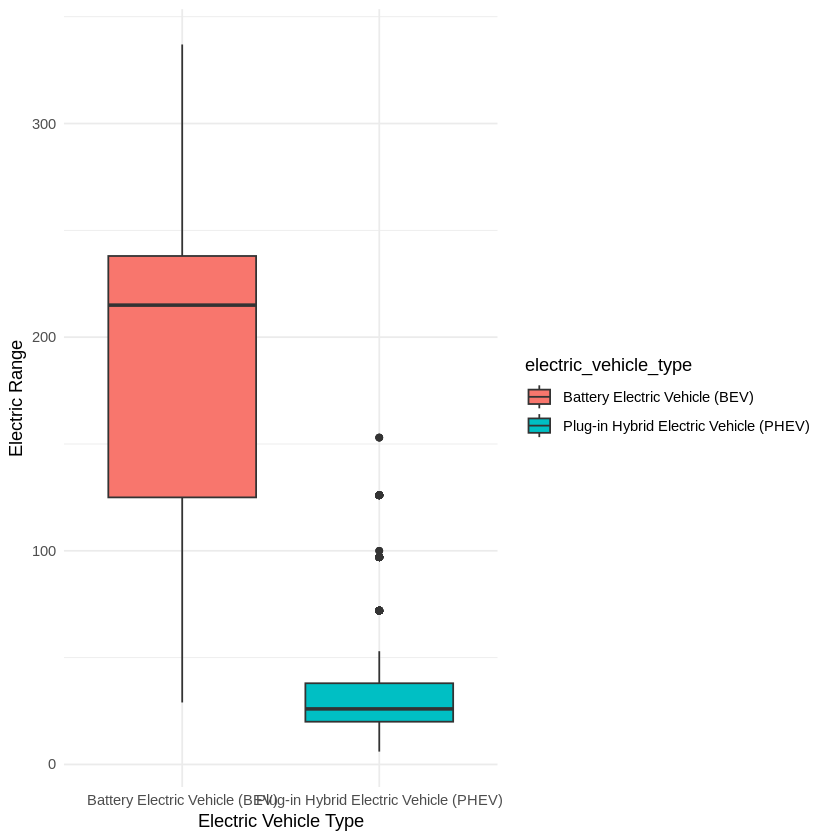

In [55]:
ggplot(data, aes(x = `electric_vehicle_type`, y = electric_range, fill = `electric_vehicle_type`)) +
  geom_boxplot() +
  labs(y = "Electric Range", x = "Electric Vehicle Type") +
  theme_minimal()

Median: BEVs have a higher median electric range (around 200 miles) compared to PHEVs (approximately 30-40 miles).

Spread: BEVs show greater variability in electric range, while PHEVs have a more consistent range.

Skewness: Both BEVs and PHEVs are right-skewed, with BEVs exhibiting a more pronounced skew due to a wider range of performance.

Outliers: Both vehicle types have outliers, but BEVs have more extreme values with some models having unusually low ranges.

In summary, BEVs generally offer higher and more variable electric ranges than PHEVs, which tend to have lower and more consistent ranges.


Que5: Find the average values of the electric range of the vehicles that meet the eligibility criteria of
“clean alternative fuel vehicle” and that do not meet so, respectively. Generate a bar plot by
placing maximum values of the electric range of vehicles on the y-axis and the two categories of
clean alternative fuel vehicle eligibility on the x-axis. Comment on the plot.

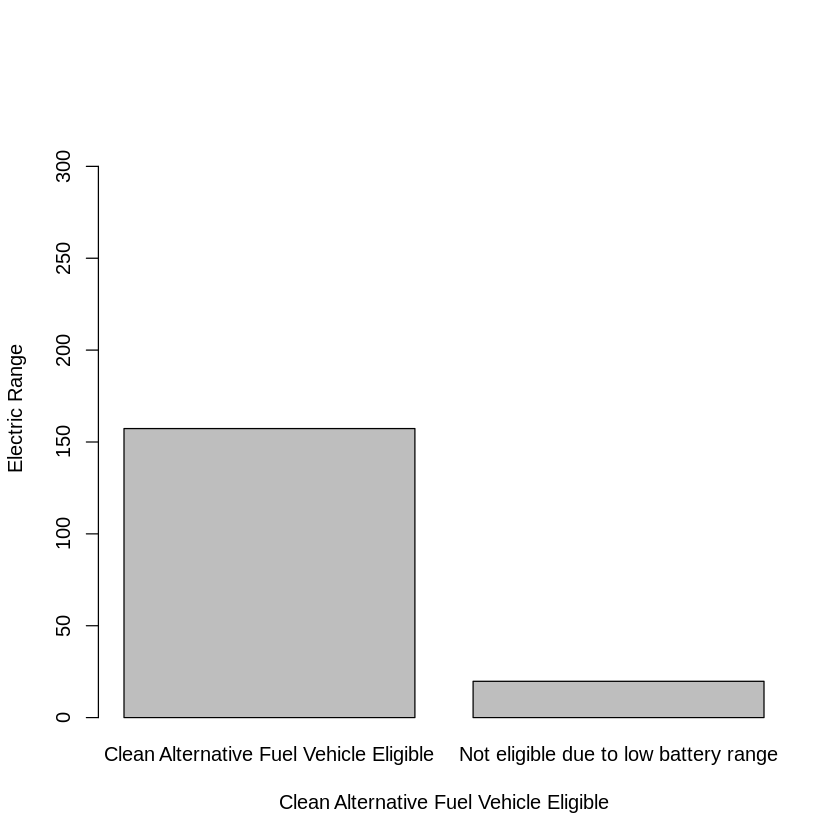

In [65]:
# Calculate average range for eligible and ineligible vehicles
avg_range <- aggregate(electric_range ~ `clean_alternative_fuel_vehicle_eligibility`, data, mean)

# Create the bar plot
barplot(avg_range$electric_range, names.arg = max_range$`clean_alternative_fuel_vehicle_eligibility`,
ylab = "Electric Range", xlab = "Clean Alternative Fuel Vehicle Eligible",ylim = c(0, max(data$electric_range)))

The bar plot displays the electric range with the y-axis scaled from 0 to the maximum possible range of over 300 miles. The average electric range for vehicles eligible for clean alternative fuel vehicle status exceeds 150 miles, while those not eligible due to low battery range is below 50 miles.

Que6: Generate a histogram of the electric range for Plug-in Hybrid Electric Vehicles (PHEVs).
Interpret the plot. Also, calculate the percentage of vehicles that fall under a 2-standard deviation
of this distribution.

Percentage of PHEVs within 2 standard deviations: 95.96102

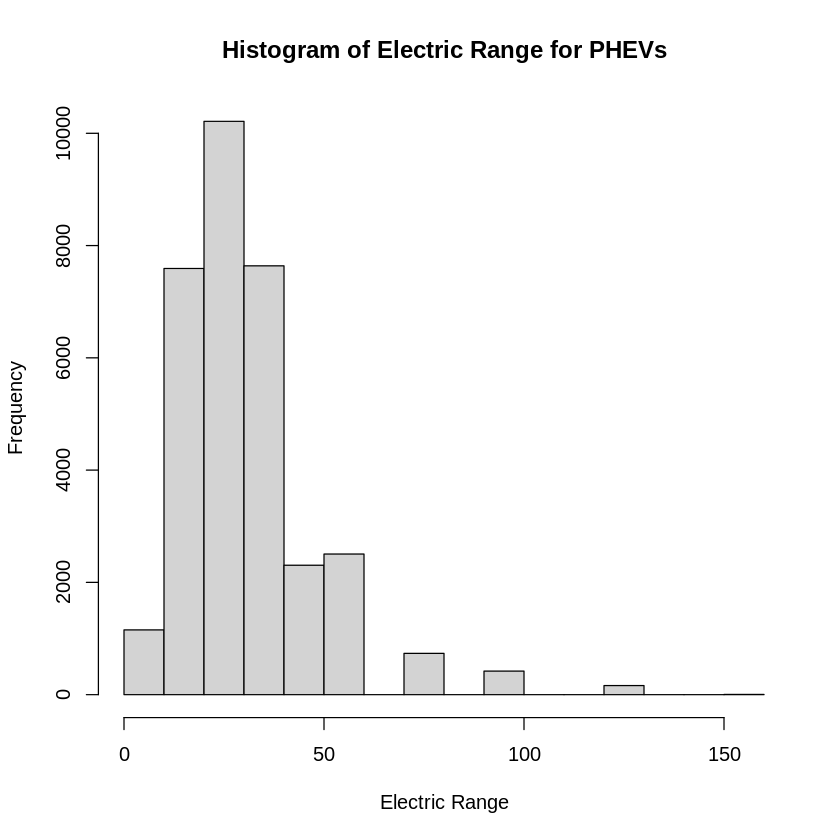

In [66]:
# Filter data for PHEVs
phevs <- data[data$electric_vehicle_type == "Plug-in Hybrid Electric Vehicle (PHEV)", ]

# Create the histogram
hist(phevs$electric_range, xlab = "Electric Range", main = "Histogram of Electric Range for PHEVs")

# Calculate mean and standard deviation
phev_mean <- mean(phevs$electric_range)
phev_sd <- sd(phevs$electric_range)

# Calculate percentage within 2 standard deviations
percentage_within_2sd <- sum(phevs$electric_range >= phev_mean - 2*phev_sd & phevs$electric_range <= phev_mean + 2*phev_sd) / length(phevs$electric_range) * 100

# Print the percentage
cat("Percentage of PHEVs within 2 standard deviations:", percentage_within_2sd)